In [4]:
import re
import json
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import Normalize
plt.style.use('ggplot')
from PIL import Image

In [ ]:
df_train_signal = pd.read_csv('../data/raw/train_signal.csv', converters={'x': json.loads, 'y': json.loads, 'z': json.loads})
df_test_signal = pd.read_csv('../data/raw/test_signal.csv', converters={'x': json.loads, 'y': json.loads, 'z': json.loads})
df_train_feature = pd.read_csv('../data/raw/train_feature.csv')
df_test_feature = pd.read_csv('../data/raw/test_feature.csv')

In [4]:
def plot_signal(row, title = None, test = False, seperate_ax = False):
    if seperate_ax:
        fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (13, 10), layout = 'constrained')
        axs.ravel()
        for ax, c in zip(axs, ['x', 'y', 'z']):
            y = row[c]
            ax.plot(y, label = c)
        plt.legend(bbox_to_anchor = [1, 1])
        if title is None:
            if not test:
                title = row['id'] + ': ' + row['activity']
            else:
                title = row['id']
        plt.suptitle(title)
        plt.show()
    else:
        fig, ax = plt.subplots(figsize = (13, 3), layout = 'constrained')
            
        for c in ['x', 'y', 'z']:
            y = row[c]
            ax.plot(y, label = c)
        plt.legend(bbox_to_anchor = [1, 1])
        if title is None:
            if not test:
                title = row['id'] + ': ' + row['activity']
            else:
                title = row['id']
        plt.suptitle(title)
        plt.show()

In [5]:
def get_mag_energy(df_row, mags = None):
    row = np.array([
        df_row['x'],
        df_row['y'],
        df_row['z']]).transpose()
    mags = np.sqrt(np.sum(np.square(row), axis = 1))
    energy = np.sum(np.square(mags))
    energy = np.round(energy / 10) * 10 # Nearest 10 Approximation to training-data
    return energy

print('i | calculated_mag | actual_mag')
for i in range(10):
    print(i, get_mag_energy(df_train_signal.iloc[i]), df_train_feature['mag_energy'].iloc[i])
mismatch_count = 0
errors = []
diffs = []
for i in range(len(df_train_signal)):
    calc = get_mag_energy(df_train_signal.iloc[i])
    actual = df_train_feature['mag_energy'].iloc[i]
    if (calc != actual) and (actual != 0):
        diff = np.abs(calc-actual)
        pc_error = (diff / actual)  * 100
        diffs.append(diff)
        errors.append(pc_error)
        mismatch_count += 1
        # print(f"Mismatch at {i}: calc={calc}, actual={actual}, diff = {diff}, pc_error = {np.round(pc_error, 3)}%")


print(f"Recalculated MAG_energy \nMismatches: {mismatch_count} of {len(df_train_signal)} Samples\nmax_diff = {max(diffs)}\nmax_pc_error = {np.round(max(errors), 4)}%")

#Imputing the values
inf_indices = df_test_feature[df_test_feature['mag_energy'] == np.inf].index

for idx in inf_indices:
    row = df_test_signal.iloc[idx]
    corrected_value = get_mag_energy(row)
    df_test_feature.loc[idx, 'mag_energy'] = corrected_value


i | calculated_mag | actual_mag
0 38750.0 38750.0
1 19500.0 19500.0
2 37010.0 37020.0
3 23050.0 23060.0
4 22660.0 22660.0
5 34430.0 34430.0
6 36280.0 36300.0
7 39460.0 39460.0
8 18230.0 18220.0
9 14280.0 14280.0
Recalculated MAG_energy 
Mismatches: 3024 of 6509 Samples
max_diff = 30.0
max_pc_error = 100.0%


In [6]:
inf_indices = df_test_feature[df_test_feature['mag_energy'] == np.inf].index

for idx in inf_indices:
    row = df_test_signal.iloc[idx]
    corrected_value = get_mag_energy(row)
    df_test_feature.loc[idx, 'mag_energy'] = corrected_value


In [15]:
percentages = class_distribution['id']/sum(class_distribution['id']) * 100

In [17]:
percentages.iloc[0]

4.532186203717929

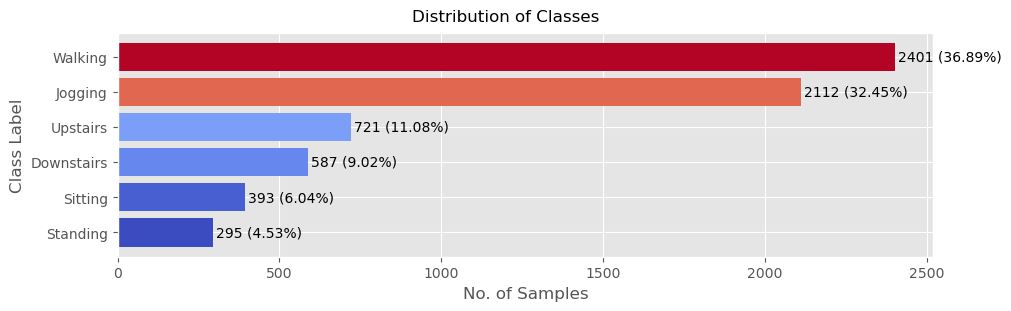

In [26]:
class_distribution = df_train_signal[['id', 'activity']].groupby('activity').count().sort_values(by = 'id')
fig, ax = plt.subplots(figsize = (10, 3), layout = 'constrained')

norm = Normalize(min(class_distribution['id']), max(class_distribution['id']))
cmap = cm.coolwarm
colors = cmap(norm(class_distribution['id']))

sum(class_distribution['id'])
ax.barh(class_distribution.index, class_distribution.id, color = colors)
for i in range(len(class_distribution)):
    ax.text(class_distribution['id'].iloc[i] + 10, i, f'{class_distribution['id'].iloc[i]} ({percentages.iloc[i]:.2f}%)',va = 'center', ha = 'left')
ax.set_xlabel('No. of Samples')
ax.set_ylabel('Class Label')
plt.suptitle('Distribution of Classes')
plt.show()
fig.savefig('figs/training_data_distributions.png')

## Feature Distributions
Though complex, the below cell produces a comprehensive plot:
* By row, axes are seperated by **activity**
* By column, axes are seperated by feature-type
* Each plot has KDE (Kernel Density Estimations) for each signal-axis. (x, y, z)

/var/folders/vb/2b3zk4lj6znd3d_lpsq9h6yc0000gn/T/ipykernel_88553/1712648974.py:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(f_set[f'{feature}_{n}'], ax = ax, label = feature, alpha = 0.8, fill = False, common_norm = False, color = palette[j])
/var/folders/vb/2b3zk4lj6znd3d_lpsq9h6yc0000gn/T/ipykernel_88553/1712648974.py:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(f_set[f'{feature}_{n}'], ax = ax, label = feature, alpha = 0.8, fill = False, common_norm = False, color = palette[j])


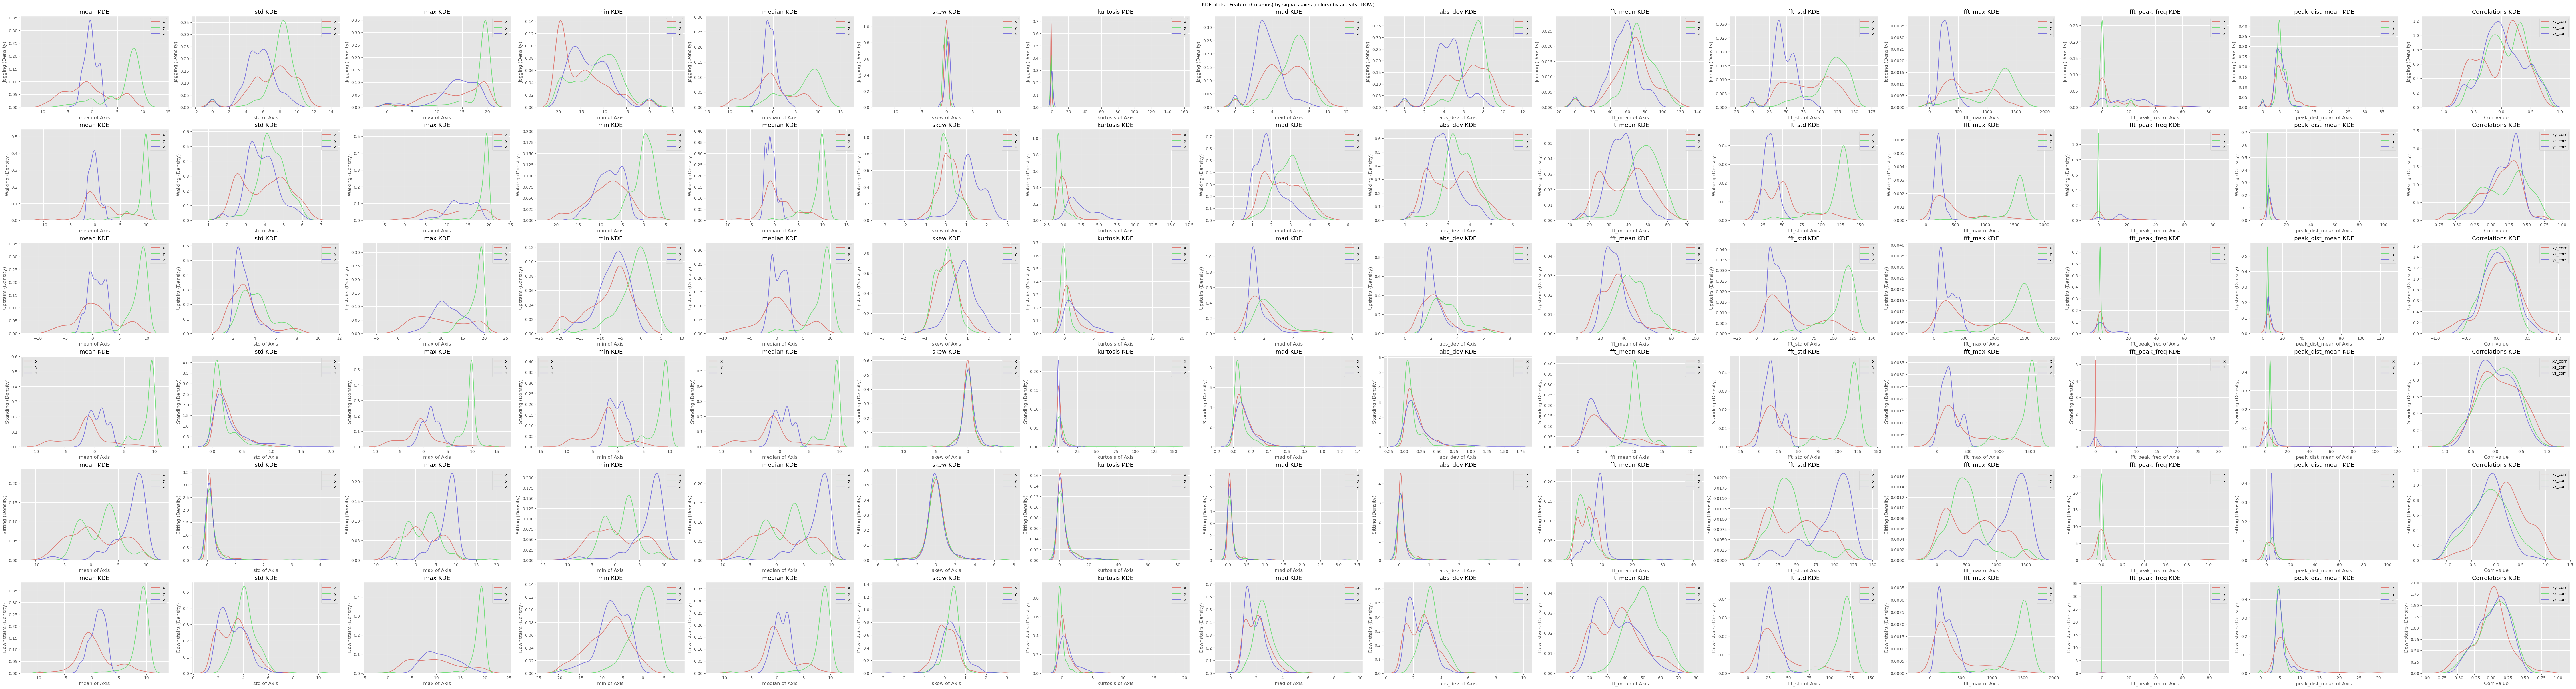

In [8]:
cols = df_train_feature.columns
features_byaxis = {}
for feature in ['x', 'y', 'z']:
    features_byaxis[feature] = []
    for c in cols:
        if re.match(f'{feature}_*', c):
            features_byaxis[feature].append(c)
features_byaxis['x'] = features_byaxis['x'][:13] + [features_byaxis['x'][15]]
features_byaxis['y'] = features_byaxis['y'][:13] + [features_byaxis['y'][14]]

activites = df_train_feature['activity'].drop_duplicates().to_list()
feature_name = [features_byaxis['x'][i][2:] for i in range(14)]

r, c = len(activites), len(feature_name) + 1

fig, axs = plt.subplots(r, c, figsize = (c*6, r*4), layout = 'constrained')
palette = sns.palettes.hls_palette(n_colors=3)


for act_num, act in enumerate(activites):
    df_slice = df_train_feature[df_train_feature['activity'] == act]
    feature_sets = [df_slice[features_byaxis[f]] for f in ['x', 'y', 'z']]
    for i, n in enumerate(feature_name):
        ax = axs[act_num][i]
        for j, (f_set, feature) in enumerate(zip(feature_sets, ['x', 'y', 'z'])):
            sns.kdeplot(f_set[f'{feature}_{n}'], ax = ax, label = feature, alpha = 0.8, fill = False, common_norm = False, color = palette[j])
            ax.set_xlabel(f'{n} of Axis')
            ax.set_ylabel(f'{act} (Density)')
            ax.set_title(f'{n} KDE')
            ax.legend()
    corr_features = ['xy_corr', 'xz_corr', 'yz_corr']
    for i, n in enumerate(corr_features):
        ax = axs[act_num][c-1]
        sns.kdeplot(df_slice[n], ax = ax, label = n, alpha = 0.8, fill = False, common_norm = False, color = palette[i])
        ax.set_xlabel(f'Corr value')
        ax.set_ylabel(f'{act} (Density)')
        ax.set_title(f'Correlations KDE')
        ax.legend()
plt.suptitle(f'KDE plots - Feature (Columns) by signals-axes (colors) by activity (ROW)')
plt.show()
# fig.savefig('kde_plots.png')


<Axes: >

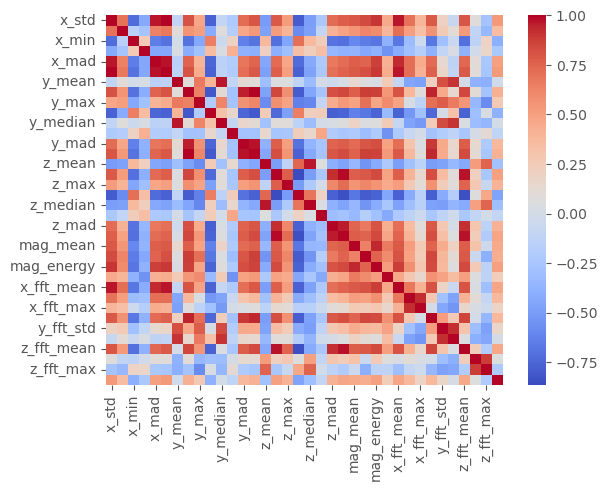

In [9]:
threshold = -0.4
func1 = lambda value: (value < threshold) 

features = df_train_feature.columns[3:]
func2 = lambda value: func1(value) & (value != 1)
threshold_crossed = df_train_feature[features].corr().map(func2)
corr_gte_threshold = threshold_crossed[threshold_crossed.any(axis = 1)].index

sns.heatmap(df_train_feature[corr_gte_threshold].corr(), cmap = 'coolwarm')

/var/folders/vb/2b3zk4lj6znd3d_lpsq9h6yc0000gn/T/ipykernel_53544/3918428763.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'center', fontdict={'size': 13})


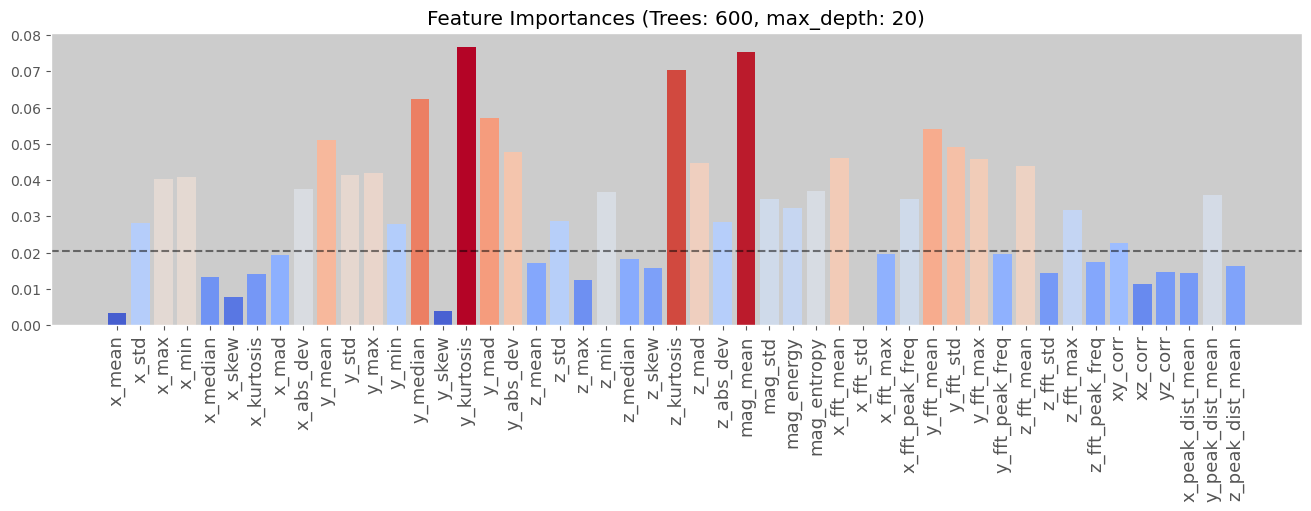

In [30]:
from custom_functions import save_submission_file, save_model_config, load_model_config, get_model_names, get_pipeline, extract_pipeline_config, best_model, CONFIG_FILE, MY_SEED, get_training_splits, STEP_CLASS_MAP

train_data_file = '../data/processed/train_feature_clean.csv'
test_data_file = '../data/processed/test_feature_clean.csv'

df_train = pd.read_csv(train_data_file)
df_test = pd.read_csv(test_data_file)

features = df_train.columns[3:]

X_train = df_train[features].values
y_train = df_train['activity']

model = load_model_config('model_1')
score = model['score']

ppl = get_pipeline(model)
ppl.fit(X_train, y_train)

try:
    importances = np.abs(ppl.named_steps['pca'].components_.T @ ppl.named_steps['randomforestclassifier'].feature_importances_)
except:
    importances = ppl.named_steps['randomforestclassifier'].feature_importances_
    
norm = Normalize(vmin = min(importances), vmax = max(importances))
cmap = cm.coolwarm

# plt.style.use('default')
plt.style.use('ggplot')
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(13, 5), layout='constrained')
colors = cmap(norm(importances))
bars = ax.bar(features, importances, color=colors)
ax.axhline(1/len(features), linestyle= 'dashed', alpha = 0.5, color = 'black')
ax.set_title(f'Feature Importances (Trees: {ppl.named_steps['randomforestclassifier'].n_estimators}, max_depth: {ppl.named_steps['randomforestclassifier'].max_depth})')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'center', fontdict={'size': 13})

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
ax_face = 0.8
ax.set_facecolor((ax_face, ax_face, ax_face))
ax.grid()
plt.savefig('figs/feature_importance_example.png')
plt.show()

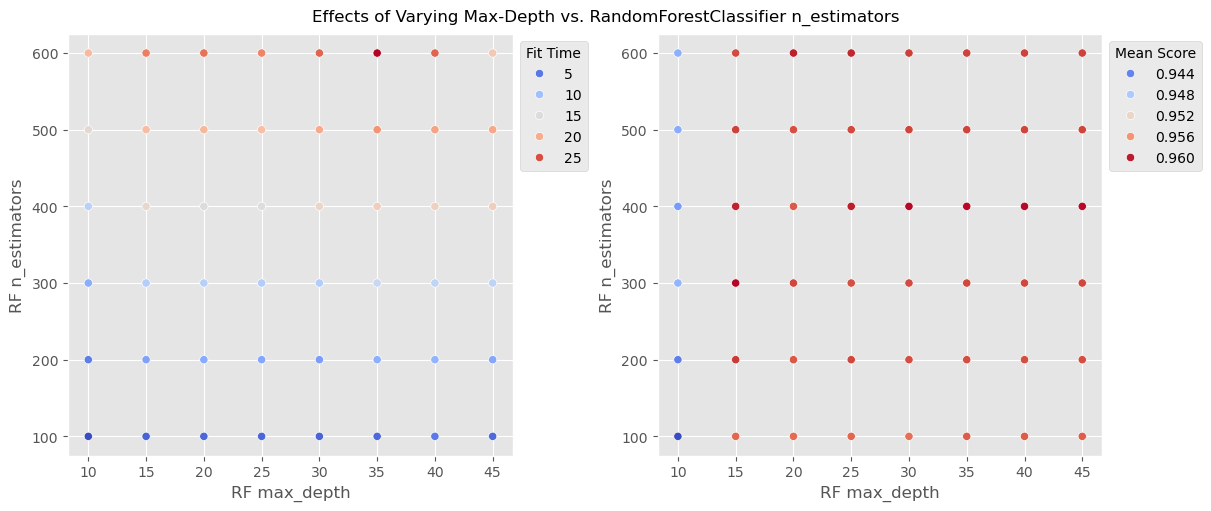

In [31]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV, StratifiedKFold
stratified_cv = StratifiedKFold(shuffle = True, random_state = MY_SEED)
scoring_method = 'f1_macro'
pipeline = load_model_config(into_pipeline=True, model_name = 'model_1.1.2')
effect_of_pca_and_maxdepth = {
    'randomforestclassifier__max_depth': np.arange(10, 50, 5),
    'randomforestclassifier__n_estimators': np.arange(100, 601, 100),
}

effect_of_nestimators_and_maxdepth_search = GridSearchCV(estimator = pipeline,
                         param_grid=effect_of_pca_and_maxdepth,
                         cv = stratified_cv, 
                         scoring = scoring_method,
                         n_jobs=-1)

effect_of_nestimators_and_maxdepth_search.fit(X_train, y_train)


fit_times = effect_of_nestimators_and_maxdepth_search.cv_results_['mean_fit_time']
n_estimators = effect_of_nestimators_and_maxdepth_search.cv_results_['param_randomforestclassifier__n_estimators']
max_depth = effect_of_nestimators_and_maxdepth_search.cv_results_['param_randomforestclassifier__max_depth']
mean_scores = effect_of_nestimators_and_maxdepth_search.cv_results_['mean_test_score']

palette = 'coolwarm'

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5), layout = 'constrained')
axs.ravel()

for ax, hue, label in zip(axs, [fit_times, mean_scores], ['Fit Time', 'Mean Score']):
    sns.scatterplot(x = max_depth, y = n_estimators, hue = hue, ax = ax, palette = palette)
    ax.legend(title = label, bbox_to_anchor = [1, 1])

[ax.set_xlabel('RF max_depth') for ax in axs]
[ax.set_ylabel('RF n_estimators') for ax in axs]

plt.suptitle('Effects of Varying Max-Depth vs. RandomForestClassifier n_estimators')
plt.show()

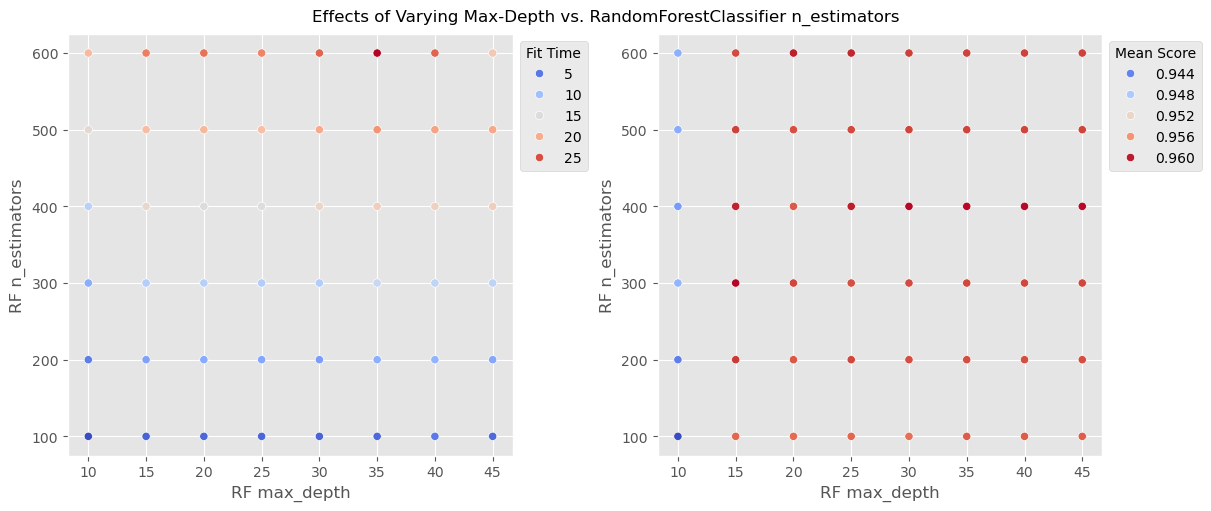

In [32]:

palette = 'coolwarm'

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5), layout = 'constrained')
axs.ravel()

for ax, hue, label in zip(axs, [fit_times, mean_scores], ['Fit Time', 'Mean Score']):
    sns.scatterplot(x = max_depth, y = n_estimators, hue = hue, ax = ax, palette = palette)
    ax.legend(title = label, bbox_to_anchor = [1, 1])

[ax.set_xlabel('RF max_depth') for ax in axs]
[ax.set_ylabel('RF n_estimators') for ax in axs]

plt.suptitle('Effects of Varying Max-Depth vs. RandomForestClassifier n_estimators')
plt.savefig('figs/max_depth_n_estimators_investigation.png')
plt.show()